The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

* total_bill: Total bill in dollars including taxes
* tip: Tip given to waiters in dollars
* sex: gender of the person paying the bill
* smoker: whether the person smoked or not
* day: day of the week
* time: lunch or dinner
* size: number of people in a table

So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips and train a machine learning model to predict the waiter’s tipping.

Now let’s start the task of waiter tips analysis and prediction by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("/kaggle/input/tipping/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Now let’s move forward by analyzing all the factors affecting waiter tips.

# ***Waiter Tips Analysis***

# Data Visualization

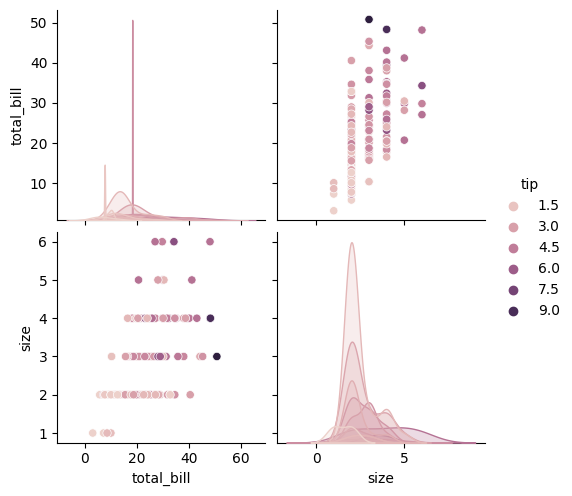

In [5]:
import seaborn as sns
sns.pairplot(data = data, hue = 'tip')

array([[<Axes: xlabel='total_bill', ylabel='total_bill'>,
        <Axes: xlabel='tip', ylabel='total_bill'>,
        <Axes: xlabel='size', ylabel='total_bill'>],
       [<Axes: xlabel='total_bill', ylabel='tip'>,
        <Axes: xlabel='tip', ylabel='tip'>,
        <Axes: xlabel='size', ylabel='tip'>],
       [<Axes: xlabel='total_bill', ylabel='size'>,
        <Axes: xlabel='tip', ylabel='size'>,
        <Axes: xlabel='size', ylabel='size'>]], dtype=object)

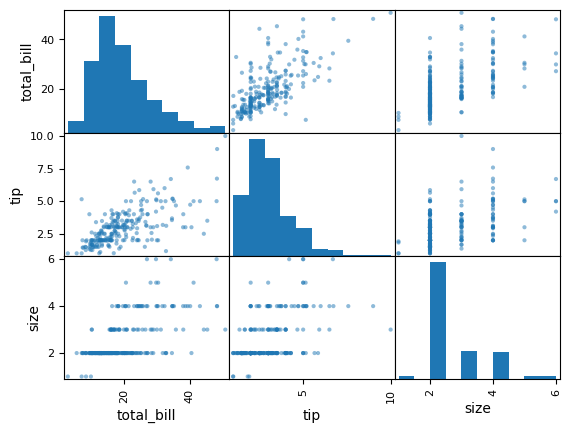

In [6]:
pd.plotting.scatter_matrix(data)

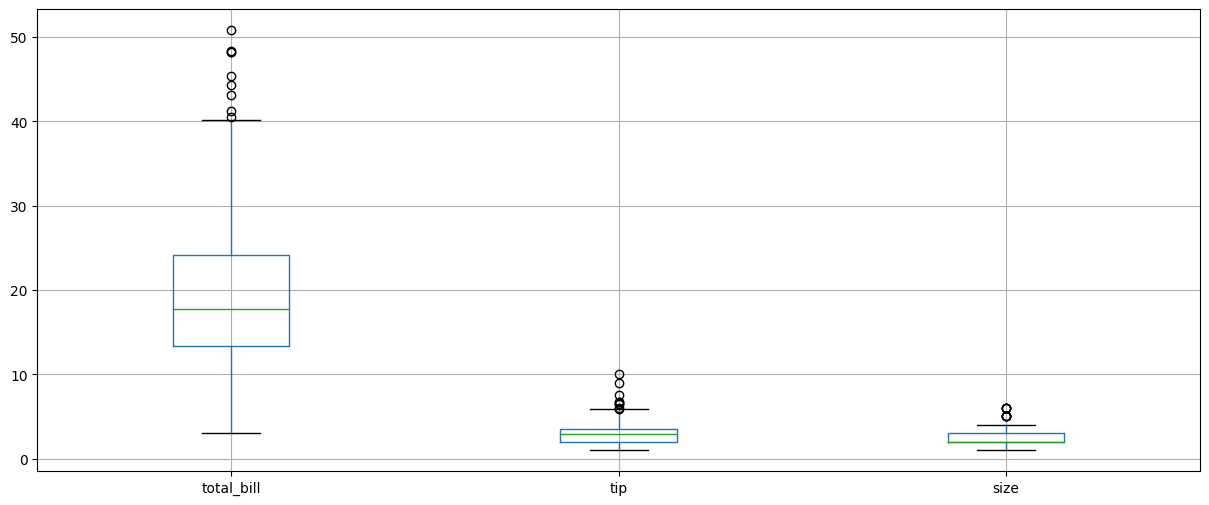

In [7]:
import matplotlib.pyplot as plt
data.boxplot(figsize=(15,6))
plt.show()

Let’s have a look at the tips given to the waiters according to:

1. the total bill paid
2. number of people at a table
3. and the day of the week:

In [8]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

Now let’s have a look at the tips given to the waiters according to: 

1. the total bill paid
2. the number of people at a table
3. and the gender of the person paying the bill:

In [9]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

Now let’s have a look at the tips given to the waiters according to:


1. the total bill paid
2. the number of people at a table
3. and the time of the meal:

In [10]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

Now let’s see the tips given to the waiters according to the days to find out which day the most tips are given to the waiters:

In [11]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

According to the visualization above, on Saturdays, most tips are given to the waiters. Now let’s look at the number of tips given to waiters by gender of the person paying the bill to see who tips waiters the most:

In [12]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

According to the visualization above, most tips are given by men. Now let’s see if a smoker tips more or a non-smoker:

In [13]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

According to the visualization above, non-smoker tips waiters more than smokers. Now let’s see if most tips are given during lunch or dinner:

In [14]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

According to the visualization above, a waiter is tipped more during dinner.

So this is how we can analyze all the factors affecting waiter tips. Now in the section below, I will take you through how to train a machine learning model for the task of waiter tips prediction.

# ***Waiter Tips Prediction Model***

Before training a waiter tips prediction model, I will do some data transformation by transforming the categorical values into numerical values:

In [15]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


# **Correlation**:

In [16]:
data.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000


<Axes: >

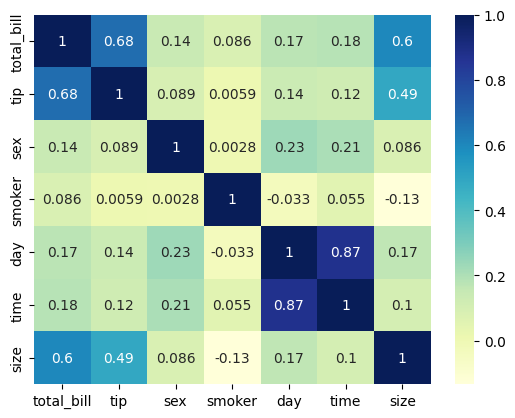

In [17]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

Now I will split the data into training and test sets:

In [18]:
x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Now below is how we can train a machine learning model for the task of waiter tips prediction using Python:

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Now let’s test the performance of this model by giving inputs to this model according to the features that we have used to train this model:

In [20]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])

This is the approx tip given to waiter according to features-values provided.
> tip ≃ 3 or 4 Dollars

# Summary

Tipping waiters for serving food depends on many factors like the type of restaurant, how many people you are with, how much amount you pay as your bill, etc. Waiter Tips analysis is one of the popular data science case studies where we need to predict the tips given to a waiter for serving the food in a restaurant. 